# ggplot2 Additions

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



|    Element    | Description               |
|:--------------|:--------------------------|
| ggtitle       |Plot Title                 |
| xlab          |x-axis labels              |
| ylab          |y-axis labels              |
| xlim          |Limits of x-axis           |
| ylim          |Limits of y-axis           |

### Using "nepali" dataset from "faraway" package
- Includes study of health of a group of Nepalese children
- Using locally saved csv file with rownames converted to Varibale

In [2]:
#library(faraway)
#data(nepali)
#write_csv(nepali, "data/nepali.csv")

### Read in data and clean up with dplyr and tidyr
- Convert id Variable to a factor
- convert sex to a factor with levels 1 and 2, and labels "Male" and "Female"
- Limit the dataset to the first measurement for each child using distinct() function from dplyr


In [3]:
nepali <- read_csv("Data/nepali.csv")
head(nepali)
dim(nepali) # 1000 observations

Parsed with column specification:
cols(
  id = col_integer(),
  sex = col_integer(),
  wt = col_double(),
  ht = col_double(),
  mage = col_integer(),
  lit = col_integer(),
  died = col_integer(),
  alive = col_integer(),
  age = col_integer()
)


id,sex,wt,ht,mage,lit,died,alive,age
120011,1,12.8,91.2,35,0,2,5,41
120011,1,12.8,93.9,35,0,2,5,45
120011,1,13.1,95.2,35,0,2,5,49
120011,1,13.8,96.9,35,0,2,5,53
120011,1,NA,NA,35,0,2,5,57
120012,2,14.9,103.9,35,0,2,5,57


[1] 1000    9

In [4]:
nepali <- nepali %>% 
  select(id, sex, wt, ht, age) %>%
  mutate(id = factor(id), sex = factor(sex, levels = c(1,2), labels = c("Male", "Female"))) %>%
  distinct(id, .keep_all = TRUE)

sample_n(nepali, 10)
dim(nepali) # 200 observations

id,sex,wt,ht,age
360162,Male,NA,NA,36
120112,Female,15.1,101.7,52
120012,Female,14.9,103.9,57
360392,Male,15.2,100.3,54
360331,Female,11.5,88.0,36
360372,Female,10.6,86.8,50
120372,Male,11.2,83.2,31
360791,Female,15.5,102.2,52
120082,Female,11.2,79.8,36
520061,Male,11.5,84.0,28


[1] 200   5

# Histogram:
- Create Histogram of children hieghts using geom_histogram() function


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 15 rows containing non-finite values (stat_bin).”

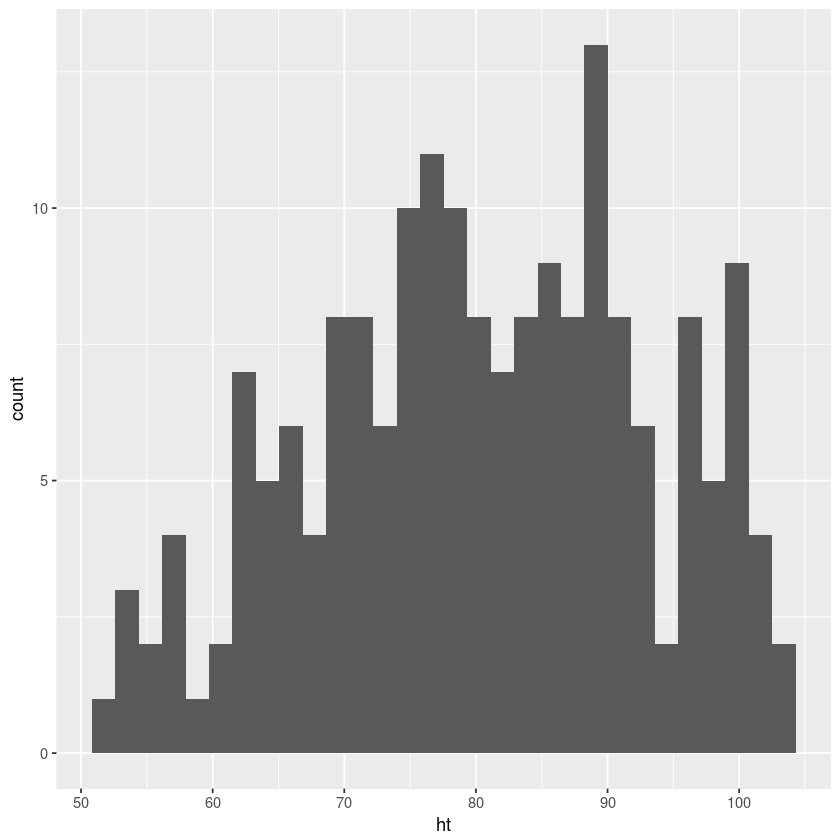

In [5]:
ggplot(data = nepali, aes(x = ht)) +
  geom_histogram()

#### Adding Title and labels

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 15 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

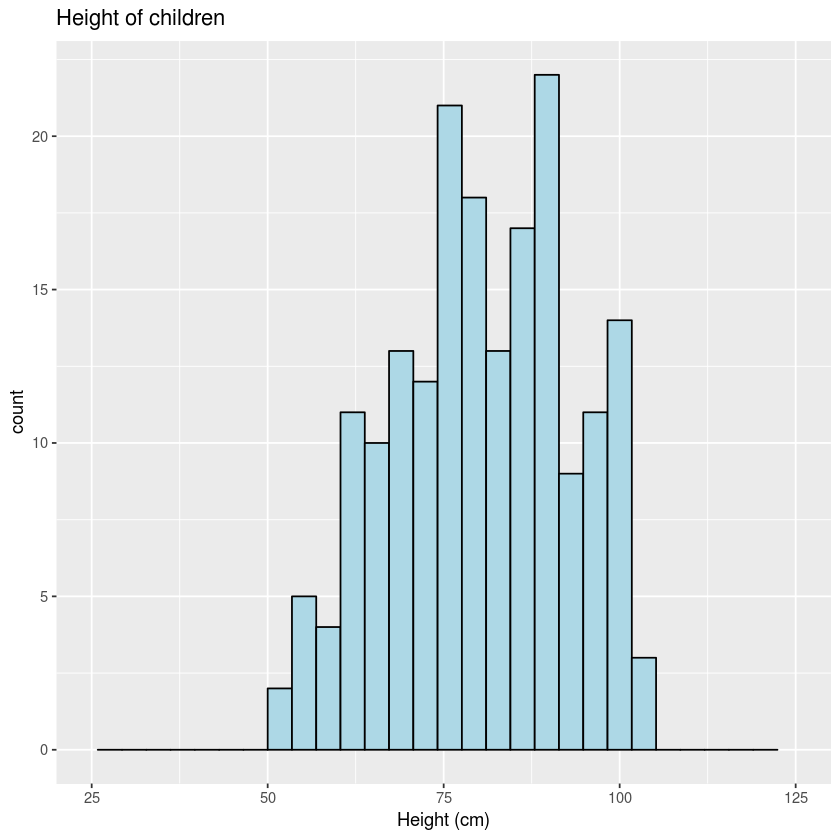

In [6]:
ggplot(data = nepali, aes(x = ht)) +
  geom_histogram( color = "black", fill = "lightblue") +
  ggtitle("Height of children") +
  xlab("Height (cm)") +
  xlim(c(25,125))

<hr>

## Scatterplot:
- Create Scatterplot of Height vs Weight using geom_point() function

Warning message:
“Removed 15 rows containing missing values (geom_point).”

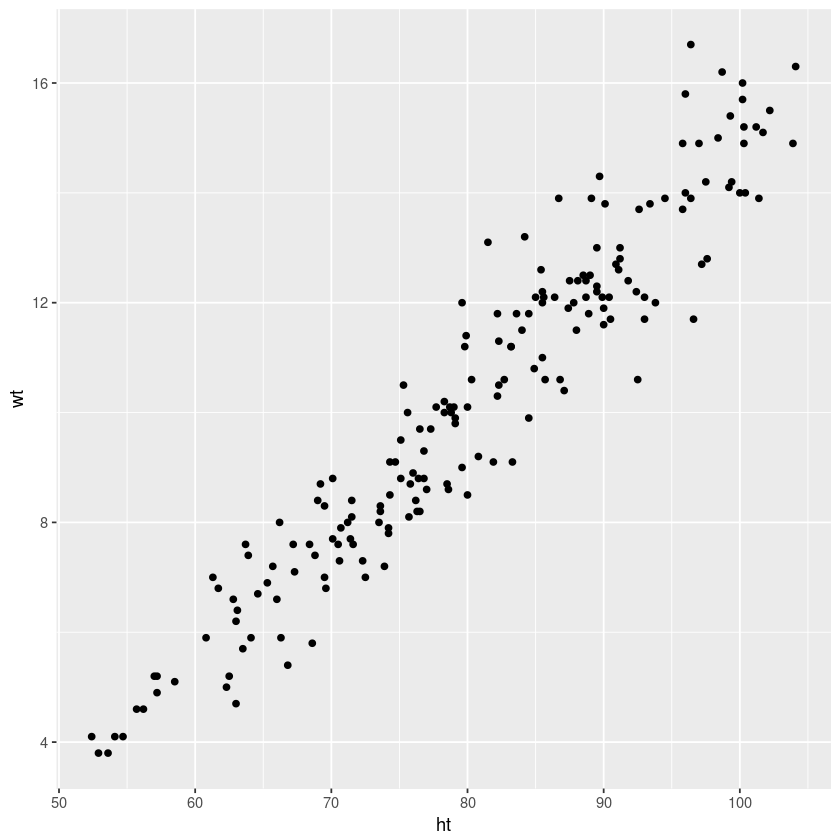

In [7]:
ggplot(data = nepali, aes(x = ht, y = wt)) + 
  geom_point()

#### Adding Title and labels

Warning message:
“Removed 15 rows containing missing values (geom_point).”

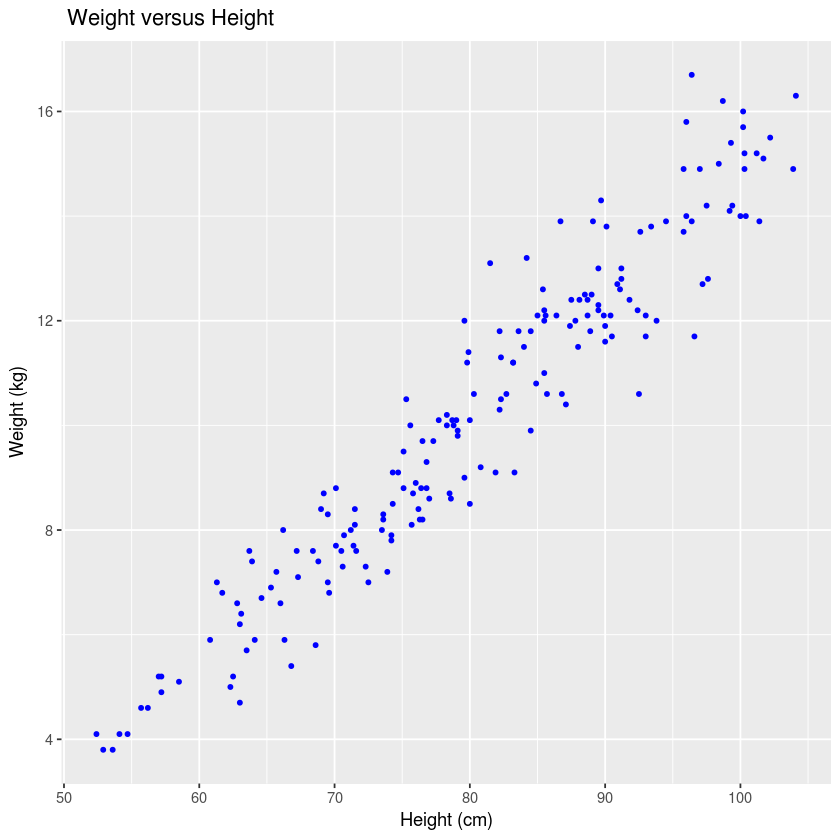

In [8]:
ggplot(data = nepali, aes(x = ht, y = wt)) + 
  geom_point(color = "blue", size = 1) +
  ggtitle(" Weight versus Height") +
  xlab("Height (cm)") +
  ylab("Weight (kg)")

#### Map a Variable to "color" aesthetic of the plot, instead of a constant


Warning message:
“Removed 15 rows containing missing values (geom_point).”

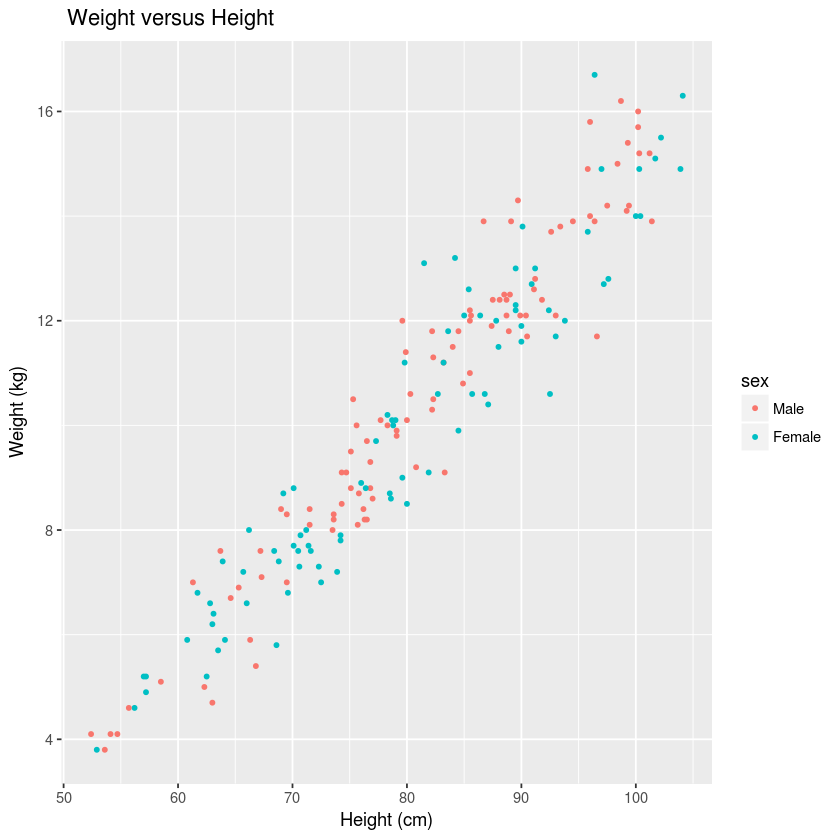

In [9]:
ggplot(data = nepali, aes(x = ht, y = wt, color = sex)) + 
  geom_point(size = 1) +
  ggtitle(" Weight versus Height") +
  xlab("Height (cm)") +
  ylab("Weight (kg)")

# Boxplot:
- Show the Distribution of a continuous variable, boxplot of heights
- Using geom_boxplot() function
- To plot a boxplot for a single, continuous varibale, map that varibale to y and x to 1

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

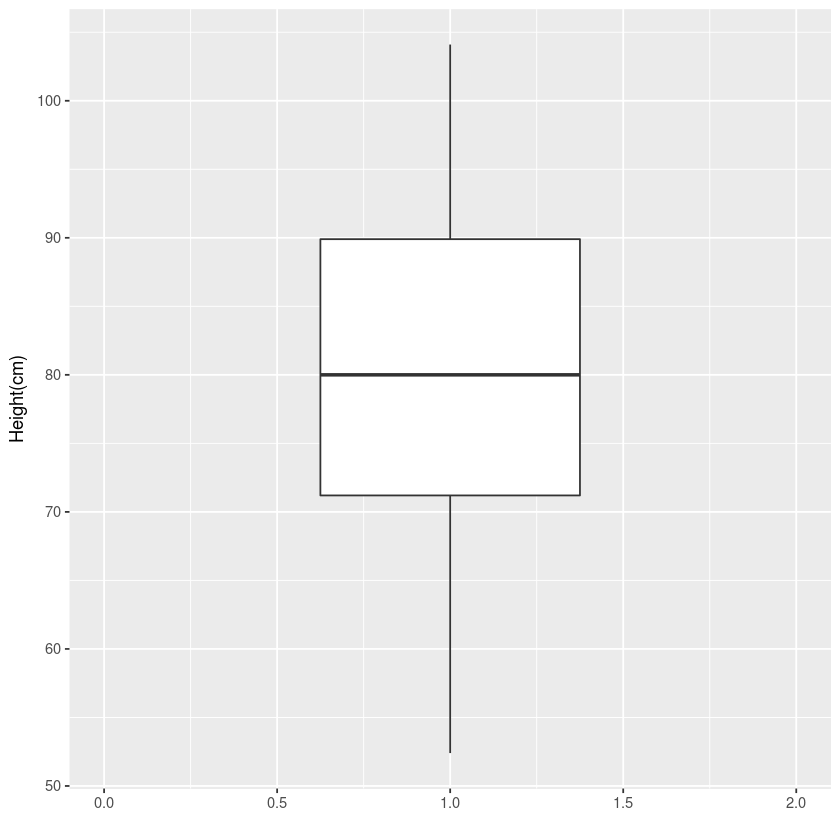

In [10]:
ggplot(data = nepali, aes(x = 1, y = ht)) +
  geom_boxplot() +
  xlab("") +
  ylab("Height(cm)") +
  xlim(c(0,2))

### Plot separate boxplots by levels
- Map columns in the dataframe to 2 aesthetics (x and y)
- y variable is the varible for the distribution
- x varibale should be discrete (TRUE/FALSE), which will be used to group the varibale

Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

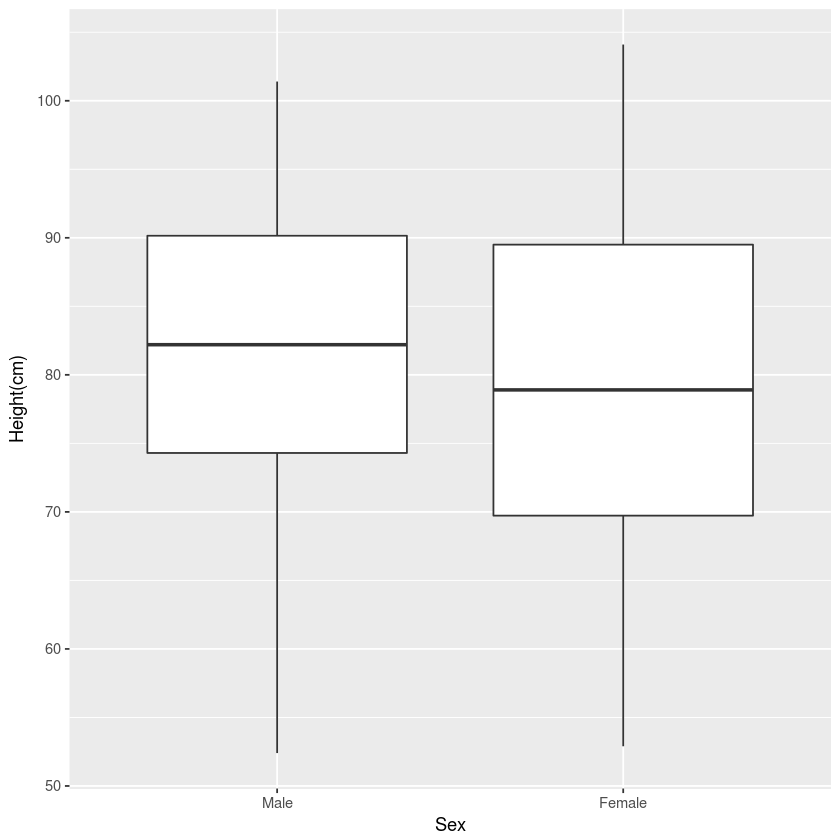

In [11]:
ggplot(data = nepali, aes(x = sex, y = ht)) +
  geom_boxplot() +
  xlab("Sex") +
  ylab("Height(cm)")